# Wrangle and Analyze Data

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
# from datetime import datetime
# from timeit import default_timer as timer
from functools import reduce


---------
### Gathering Data

#### First Start by extracting data from Twitter Api and convert into csv file so it can be easy to handle in further process

#### 1) Extraction data from Twitter API

In [2]:
consumer_key ='u0vJjjSnKfRvYlkdPgEAg0YYK'
consumer_secret ='tfrfs5CGhrppRSkSht60aydietRzO5UgXiyo0BEs1eRyXgaM26'
access_key ='3114642466-UKdh3TuwLBnBMnXL2NjiupsXGa98rSUd2Z8asBq'
access_secret = 'zSSUc1uAYacBf0v4VOdOg8htEWL9ESXV62iq9AGcDqITL'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [5]:
tweet_data = []
for tweet_id in _id:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
    except:
        print(tweet_id)

In [6]:
# Write tweet data to json file
with open('tweet-json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [7]:
df_tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt') as data_file:
    for line in data_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_tweet_json = df_tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
        columns=['tweet_id', 'retweet_count', 'favorite_count']))
        df_tweet_json = df_tweet_json.reset_index(drop=True)

In [8]:
df_tweet_json.to_csv('tweetapi.csv',index=False)
tweetapi = pd.read_csv('tweetapi.csv')

#### 2) Extracting image-predictions data from udemy server and stored into csv file for further process speed up

In [9]:
# Image Predictions File
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)
    
img_pred = pd.read_csv("image-predictions.tsv",sep="\t")  

#### 3) we dont have to work lot for this dataset becasue it came with the instruction in csv formate

In [10]:
# Enhanced Twitter Archive
twit_arch_en = pd.read_csv('twitter-archive-enhanced.csv')

### Now we have accoured all three dataset in csv formate

In [11]:
tweetapi.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
twit_arch_en.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


---------------


## Assessing Data

#### Access Twitter-archive-enhanced Dataset 

In [14]:
twit_arch_en.shape

(2356, 17)

In [15]:
twit_arch_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# Nan Value count
twit_arch_en.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
twit_arch_en.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
# No Duplicate rows
twit_arch_en.duplicated().sum()

0

In [19]:
twit_arch_en.name.value_counts().head(60)

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Daisy         7
Bailey        7
Toby          7
an            7
Buddy         7
Leo           6
Jax           6
Stanley       6
Dave          6
Bella         6
Koda          6
Scout         6
Milo          6
Rusty         6
Oscar         6
Jack          6
Oakley        5
Phil          5
Sammy         5
Louis         5
Finn          5
very          5
Chester       5
George        5
Gus           5
Alfie         5
Larry         5
Bentley       5
Sunny         5
Walter        4
Ruby          4
Maddie        4
Moose         4
Reginald      4
Scooter       4
Winnie        4
Brody         4
Beau          4
Bruce         4
Reggie        4
Sophie        4
Dexter        4
Duke          4
Jerry         4
Bear          4
Cassie        4
Clarence      4
Name: name, dtype: int64

In [20]:
twit_arch_en['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
twit_arch_en['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
twit_arch_en['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
twit_arch_en['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Quality Issues from the above Twitter-archive-enhanced Dataset 
- Missing data in the following columns: <br>
    1) in_reply_to_status_id, <br>
    2) in_reply_to_user_id, <br>
    3) retweeted_status_id, <br>
    4) etweeted_status_user_id, <br>
    5) retweeted_status_timestamp, <br>
    6) expanded_urls<br><br>

- Source columns have HTML tags <br><br>

- Timestamp and retweeted_status_timestamp is in object datatype <br><br>

- This dataset includes retweets, which means there is duplicated data <br><br>

- retweeted_status_id column possess float datatype but it should be int formate <br><br>

- Some of the Dogs name have been entered wrongly such as  'None', 'a', 'an',  'by' and some more <br><br>


### Tidiness Issues

- The variable for the dog's stage (dogoo, floofer, pupper, puppo) is spread in different columns <br><br>




----------------
#### Access Image Prediction Dataset

In [24]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
img_pred.shape

(2075, 12)

In [26]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# Nan Value count
img_pred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [28]:
# No Duplicate rows
img_pred.duplicated().sum()

0

In [29]:
img_pred[img_pred.jpg_url.duplicated()].jpg_url.count()

66

### Quality Issues from the above Image Prediction Dataset

- Dog breeds are not consistently in p1,p2,p3 columns 


### Tidiness Issues:

  - This data set is part of the same observational unit as the data in the Twitter-archive-enhanced Dataset 


----------------
#### Access tweeter API Dataset

In [30]:
tweetapi.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [31]:
tweetapi.shape

(2354, 3)

In [32]:
tweetapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [33]:
# No Duplicate rows
tweetapi.duplicated().sum()

0

In [34]:
# Nan Value count
tweetapi.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality Issues from the above Image Prediction Dataset

- No issues from this dataset

### Tidiness Issues:

  - This data set is also part of the same observational unit as the data in the Twitter-archive-enhanced Dataset 

--------------

## Clean

In [35]:
# Taking a backup of all dataset before procedding

tweet_api  =  tweetapi.copy()
img_df    =  img_pred.copy()
tweet_df   =  twit_arch_en.copy()

### Image_Prediction DataSet

In [37]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# adding a new column name dog_breed which will take all the p1, p2, p3, columns and provide 
# single dog breed based on confidence level 

   #### Creates a predicted dog breed column, based on the the highest confidence level and 'p1_dog', 'p2_dog' and 'p3_dog' statements


In [38]:
li = []
for ids in img_df.tweet_id:
    p1c = img_df[img_df.tweet_id == ids].p1_conf.values[0]
    p2c = img_df[img_df.tweet_id == ids].p2_conf.values[0]
    p3c = img_df[img_df.tweet_id == ids].p3_conf.values[0]
    
    if p1c > p2c and p1c > p3c:
        li.append(img_df[img_df.tweet_id == ids].p1.values[0])
        
    elif p2c > p1c and p2c > p3c:
        li.append(img_df[img_df.tweet_id == ids].p2.values[0])
        
    else:
        li.append(img_df[img_df.tweet_id == ids].p3.values[0])

img_df['dog_breed'] = li

In [39]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


In [42]:
## Dropping 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
img_df.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

#### Test

In [43]:
img_df.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Twitter API Dataset

In [46]:
tweet_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [47]:
tweet_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [49]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Remove columns no longer needed based on retweet : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

In [50]:
# drop the reply status and retweet status columns
tweet_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

In [52]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [53]:
tweet_df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Hazel        1
Rinna        1
Evy          1
Cupid        1
Gustaf       1
Name: name, Length: 957, dtype: int64

In [58]:
# replacing unwanted misspelled unaccurate words eg:( 'a', 'an', 'the', 'None') from name column with nan

words = tweet_df[tweet_df.name.str.islower()].name.unique()
words

ValueError: cannot mask with array containing NA / NaN values

In [56]:
# example
tweet_df[tweet_df.name == 'such']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None


In [57]:
tweet_df['name'] = tweet_df['name'].replace(words, np.nan)
tweet_df['name'] = tweet_df['name'].replace('None', np.nan)

In [60]:
tweet_df.name.value_counts()

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Lola       10
           ..
Iggy        1
Fynn        1
Jiminus     1
Gabby       1
Ed          1
Name: name, Length: 931, dtype: int64

In [61]:
tweet_df.shape

(2356, 12)

In [63]:
tweet_df['name'].dropna(inplace=True)

In [64]:
tweet_df.shape

(2356, 12)

In [66]:
tweet_df.isna().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls          59
rating_numerator        0
rating_denominator      0
name                  854
doggo                   0
floofer                 0
pupper                  0
puppo                   0
dtype: int64

In [72]:
# Converting the columns [doggo, floofer, pupper, puppo] from None to nan 
tweet_df['doggo'] = tweet_df['doggo'].replace('None', np.nan)
tweet_df['floofer'] = tweet_df['floofer'].replace('None', np.nan)
tweet_df['pupper'] = tweet_df['pupper'].replace('None', np.nan)
tweet_df['puppo'] = tweet_df['puppo'].replace('None', np.nan)

In [73]:
tweet_df.isna().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls           59
rating_numerator         0
rating_denominator       0
name                   854
doggo                 2259
floofer               2346
pupper                2099
puppo                 2326
dtype: int64

In [74]:
# Based on the below data we can drop this columns [doggo, floofer, pupper, puppo] 
tweet_df.drop(['doggo', 'floofer', 'pupper','puppo'], axis = 1, inplace=True)

In [75]:
tweet_df.isna().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls          59
rating_numerator        0
rating_denominator      0
name                  854
dtype: int64

In [76]:
tweet_df['name'] = tweet_df['name'].replace(np.nan, 'Not_Given')

In [78]:
tweet_df.shape

(2356, 8)

### Joing all three dataset 

In [115]:
data = [tweet_df, img_df, tweet_api]
df = reduce(lambda left, right:  pd.merge(left, right,on = 'tweet_id'), data)

In [116]:
df.shape

(2073, 13)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2073 non-null   int64 
 1   timestamp           2073 non-null   object
 2   source              2073 non-null   object
 3   text                2073 non-null   object
 4   expanded_urls       2073 non-null   object
 5   rating_numerator    2073 non-null   int64 
 6   rating_denominator  2073 non-null   int64 
 7   name                2073 non-null   object
 8   jpg_url             2073 non-null   object
 9   img_num             2073 non-null   int64 
 10  dog_breed           2073 non-null   object
 11  retweet_count       2073 non-null   int64 
 12  favorite_count      2073 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 226.7+ KB


### Datatype conversion

#### Changing tweet_id datatype from int to object 

In [118]:
df['tweet_id'] = df['tweet_id'].astype('object')

#### Changing timestamp datatype from object to datetime 

In [121]:
df['timestamp'] =  pd.to_datetime(df["timestamp"])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2073 non-null   int64              
 6   rating_denominator  2073 non-null   int64              
 7   name                2073 non-null   object             
 8   jpg_url             2073 non-null   object             
 9   img_num             2073 non-null   int64              
 10  dog_breed           2073 non-null   object             
 11  retweet_count       2073 non-null   int64              
 12  favorite_count      2073 non-null 

In [123]:
df['timestamp'].sample(5)

1968   2015-11-20 22:30:44+00:00
2071   2015-11-15 23:05:30+00:00
1726   2015-12-03 17:23:00+00:00
130    2017-05-08 00:54:59+00:00
307    2017-02-01 17:44:55+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [124]:
df['timestamp'].describe()

count                          2073
unique                         2073
top       2015-12-08 16:21:41+00:00
freq                              1
first     2015-11-15 22:32:08+00:00
last      2017-08-01 16:23:56+00:00
Name: timestamp, dtype: object

#### Cleaning Source column by removing html tags from it 

In [125]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048


In [126]:
href = df["source"].str.split('"', expand = True)
df["source"] = href[1]

In [127]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048


### Ratting the dog from the text column

In [130]:
print(df.text[0])
print(df.text[1])
print(df.text[2])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


#### Splitting ratings from the text column

In [138]:
ratings = df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[0].values

In [139]:
ratings

array(['13', '13', '12', ..., '9', '7', '8'], dtype=object)

In [141]:
len(ratings)

2073

#### Now we add a new column naming it as ratting

In [142]:
df['ratting'] = ratings

In [144]:
df.sample(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_breed,retweet_count,favorite_count,ratting
1688,673343217010679808,2015-12-06 03:28:27+00:00,http://twitter.com/download/iphone,IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,https://twitter.com/dog_rates/status/673343217...,11,10,Not_Given,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,289,1038,11
1648,674063288070742018,2015-12-08 03:09:46+00:00,http://twitter.com/download/iphone,This is Earl. Earl is lost. Someone help Earl....,https://twitter.com/dog_rates/status/674063288...,5,10,Earl,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,2450,6769,5
1521,677557565589463040,2015-12-17 18:34:46+00:00,http://twitter.com/download/iphone,Reckless pupper here. Not even looking at road...,https://twitter.com/dog_rates/status/677557565...,10,10,Not_Given,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,1322,2665,10
17,888804989199671297,2017-07-22 16:56:37+00:00,http://twitter.com/download/iphone,This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,4559,26080,13


### saving dataset in to new csv

In [145]:
df.to_csv('weratethedog.csv',index=False)

----------------

### Final Result

In [208]:
weratethedog_df = pd.read_csv('weratethedog.csv')
weratethedog_df['timestamp'] =  pd.to_datetime(weratethedog_df["timestamp"])

In [148]:
weratethedog_df.sample(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_breed,retweet_count,favorite_count,ratting
800,750011400160841729,2016-07-04 17:00:26+00:00,https://about.twitter.com/products/tweetdeck,Meet Piper. She's an airport doggo. Please ret...,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,1,muzzle,1035,3568,11.0
1478,679503373272485890,2015-12-23 03:26:43+00:00,http://twitter.com/download/iphone,This is Dwight. He's a pointy pupper. Very doc...,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,1673,3484,8.0
161,853760880890318849,2017-04-17 00:03:50+00:00,http://twitter.com/download/iphone,Say hello to Alice. I'm told she enjoys car ri...,https://twitter.com/dog_rates/status/853760880...,12,10,Alice,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,6403,30414,12.0
705,761745352076779520,2016-08-06 02:06:59+00:00,http://twitter.com/download/iphone,Guys.. we only rate dogs. Pls don't send any m...,https://twitter.com/dog_rates/status/761745352...,11,10,Not_Given,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,979,4707,11.0


In [149]:
weratethedog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   timestamp           2073 non-null   object 
 2   source              2073 non-null   object 
 3   text                2073 non-null   object 
 4   expanded_urls       2073 non-null   object 
 5   rating_numerator    2073 non-null   int64  
 6   rating_denominator  2073 non-null   int64  
 7   name                2073 non-null   object 
 8   jpg_url             2073 non-null   object 
 9   img_num             2073 non-null   int64  
 10  dog_breed           2073 non-null   object 
 11  retweet_count       2073 non-null   int64  
 12  favorite_count      2073 non-null   int64  
 13  ratting             2073 non-null   float64
dtypes: float64(1), int64(6), object(7)
memory usage: 226.9+ KB


In [150]:
weratethedog_df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count,ratting
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,7.383634e+17,12.265798,10.511819,1.203570,2976.089243,8556.718283,12.223724
std,6.780118e+16,40.699924,7.180517,0.561856,5054.897526,12098.640994,40.673900
min,6.660209e+17,0.000000,2.000000,1.000000,16.000000,0.000000,0.000000
25%,6.764706e+17,10.000000,10.000000,1.000000,634.000000,1674.000000,10.000000
50%,7.119681e+17,11.000000,10.000000,1.000000,1408.000000,3864.000000,11.000000
75%,7.931959e+17,12.000000,10.000000,1.000000,3443.000000,10937.000000,12.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,79515.000000,132810.000000,1776.000000


### Commenly used dog names?

Text(0, 0.5, 'Sequential')

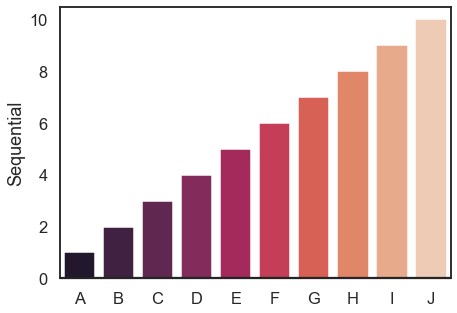

In [157]:
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.plot();

In [169]:
dog_name = weratethedog_df['name'].value_counts()[1:11].sort_values(ascending=False)

In [172]:
name_=[]
freq_=[]
for name, freq in dog_name.items(): 
    name_.append(name)
    freq_.append(freq)    

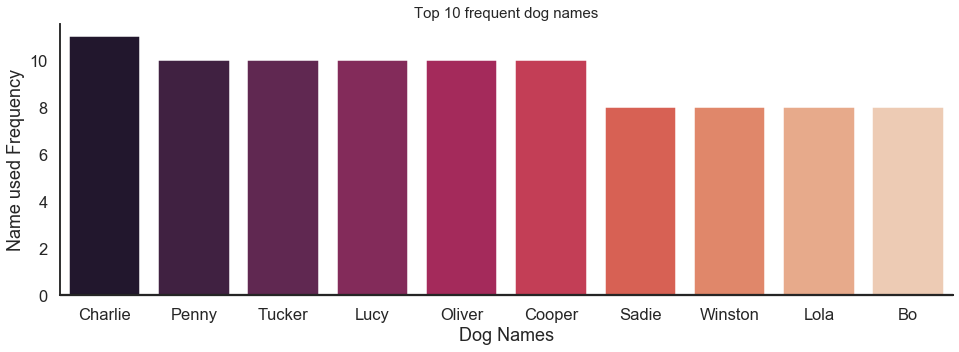

In [267]:
sns.set(style="white", context="talk")
f, ax1 = plt.subplots(figsize=(16, 5), sharex=True)

sns.barplot(x=name_, y=freq_, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
plt.ylabel('Name used Frequency')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
sns.despine()

###### Most of the dogs names are: Charlie, Penny ,Tucker, and so on ....

### Most common pet dog breeds are : 

In [182]:
common_breed = weratethedog_df['dog_breed'].value_counts()[0:10].sort_values(ascending=False)

In [183]:
breed_=[]
common_=[]
for breed, common in common_breed.items(): 
    breed_.append(breed)
    common_.append(common)    

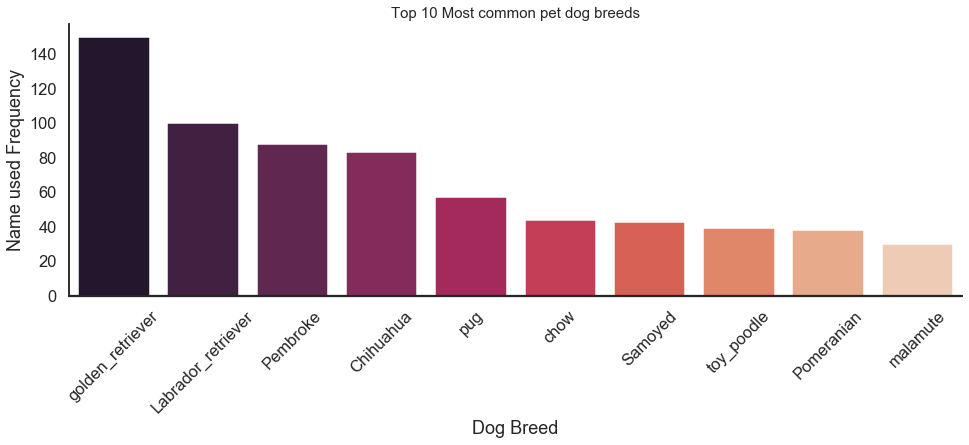

In [266]:
sns.set(style="white", context="talk")
f, ax1 = plt.subplots(figsize=(16, 5), sharex=True)


sns.barplot(x=breed_, y=common_, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
plt.ylabel('Name used Frequency')
plt.title('Top 10 Most common pet dog breeds', size=15)
plt.xlabel('Dog Breed')

plt.xticks(rotation=45)
sns.despine()

In [196]:
weratethedog_df['dog_breed'].value_counts()[0:10].sort_values(ascending=False)

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: dog_breed, dtype: int64

### Top 10 Highest Tweet in which date

In [209]:
dates = weratethedog_df['timestamp'].dt.date

In [211]:
weratethedog_df['date'] = dates

In [241]:
count = {} 
date_ = []
dcount_ = []
for i in dates: 
    count[i] = count.get(i, 0) + 1

data = {k: v for k, v in sorted(count.items(), key=lambda item: item[1])}

    
for date, count in data.items(): 
    date_.append(date)
    dcount_.append(count)

In [244]:
dcount_[-11:-1]
date_[-11:-1]

[datetime.date(2015, 12, 8),
 datetime.date(2015, 12, 7),
 datetime.date(2015, 11, 23),
 datetime.date(2015, 11, 22),
 datetime.date(2015, 11, 25),
 datetime.date(2015, 11, 20),
 datetime.date(2015, 12, 1),
 datetime.date(2015, 11, 19),
 datetime.date(2015, 11, 16),
 datetime.date(2015, 11, 29)]

Text(0.5, 0, 'Date tweeted')

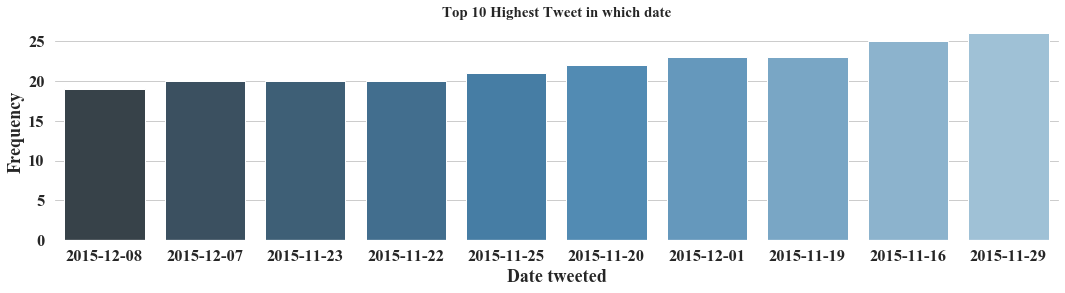

In [268]:
plt.figure(figsize=(18,4))

sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Times New Roman'})

ax = sns.barplot(x=date_[-11:-1], y=dcount_[-11:-1],palette="Blues_d")

plt.ylabel('Frequency')
plt.title('Top 10 Highest Tweet in which date', size=15)
plt.xlabel('Date tweeted')


## Analysis


### Problems worked

   - The dog_breed column is created based on the the high confidence level and 'p1_dog', 'p2_dog' and 'p3_dog' statements
   - dropped this columns (doggo, floofer, pupper, puppo) because they have the high range of nan values
   - tweet_id is set as object type as it is not going to use for calculation.
   - A main dataframe is created using tweet_api, img_df, and tweet_df dataframes
   - Dog Names Issue got rectified
   - Inconsistency in dog_breed got removed
   - All retweets get deleted to get unique tweets
   - The columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp is removed which is not needed
   - Timestamp format got corrected to datetime format
   - Extra HTML tags from source column get refracted
   - Dog ratings get standardized.


### Reference
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python

https://docs.python.org/3/library/datetime.html

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

https://tweepy.readthedocs.io/en/v3.2.0/api.html#API.get_status

https://thepythonguru.com/python-builtin-functions/reduce/

https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python?answertab=oldest#tab-top